# Prepare Data

##Import

In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

#from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
#from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [10]:
#load our data using pandas
df = pd.read_csv("Automobile_data-checkpoint.csv")

##Explore

In [11]:
# display first 5 rows from dataset
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [12]:
# find the shape of dataset
df.shape

(205, 26)

In [13]:
# display some information about Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

* i see there is no `Nulls` , But this does not mean that there is no missing values , because i see `?` in data
* there are some `object` features needs to converted to `numeric`

In [14]:
# find number of `NaN` in each column
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

* as we see here , there is no `Nulls`

In [15]:
#finding number of '?' missing values in each column
(df=='?').sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

* but here ara the missing values which represented as `?`

In [16]:
#replacing all missing data with `NaN` 
df.replace({'?': np.nan}, inplace=True)

In [17]:
#make sure there is no "?" 
(df=='?').sum().sum()

0

In [18]:
#number of Nulls after replacing
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

* we will find that number of `Nulls` = number of `?`

In [19]:
# get number of unique values in each column
df.nunique()

symboling              6
normalized-losses     51
make                  22
fuel-type              2
aspiration             2
num-of-doors           2
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  38
stroke                36
compression-ratio     32
horsepower            59
peak-rpm              23
city-mpg              29
highway-mpg           30
price                186
dtype: int64

▶ from `nunique()` we can know that ◀
1. the `high` numbers maybe be `continuous` Feature
2. the `low` numbers should be `categorical`
3. we can know high & low `cardinality`  



###Explore each column

In [20]:
# get all columns names
col_names = df.columns.values
col_names

array(['symboling', 'normalized-losses', 'make', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'], dtype=object)

#### 🤑💰 price col ➡ 26

🤑💰 the price of the car in US dollars
  * i will start with `price` column , too avoid any errors in visualisation 

In [21]:
# get the column type
col_names[-1] , df[col_names[-1]].dtype

('price', dtype('O'))

In [22]:
#convert it to float 
df['price'] = df['price'].astype(float)
df['price'].dtype

dtype('float64')

In [23]:
#find if it contains "NAN"
df['price'].isna().sum()

4

In [24]:
df.shape

(205, 26)

In [25]:
# Drop any rows with missing price values
df.dropna(subset=['price'], inplace=True)

In [26]:
df['price'].isna().sum() , df.shape

(0, (201, 26))

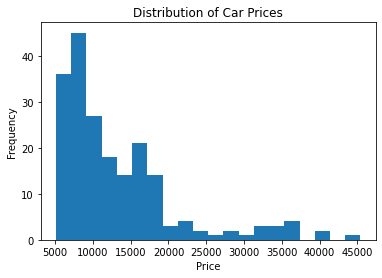

In [27]:
# Create a histogram of the 'price' column
plt.hist(df['price'],bins=20)
# Add labels and a title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')
# Show the plot
plt.show();

* we find that `price` column are `left skewed` , so we need to transform it 

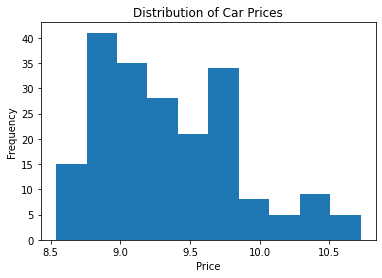

In [28]:
# Create a histogram of the 'price' column
plt.hist(np.log(df['price']))
# Add labels and a title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')
# Show the plot
plt.show();

* now we see it in almost `Normal distripution`: 

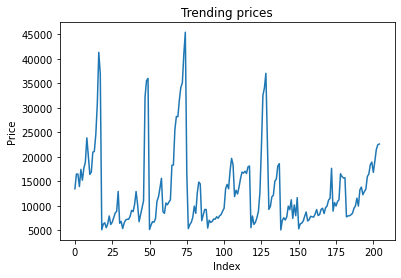

In [29]:
# plot the "price" column to see trending in it
df['price'].plot()
plt.title("Trending prices")
plt.xlabel("Index")
plt.ylabel('Price');

* notice that most `prices` are less than `20000` 

In [30]:
# ratio of data less than "15000"
len(df[df['price']<20000]) / len(df)

0.8756218905472637

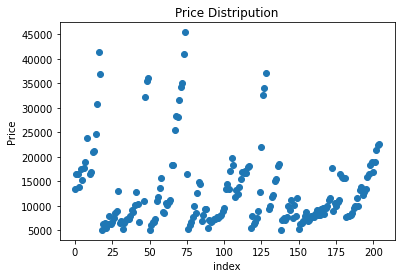

In [31]:
# distripution of the price
plt.scatter(y=df['price'],x=df['price'].index);
plt.title("Price Distripution")
plt.xlabel("index")
plt.ylabel("Price");

* another way to tell us that most prices are less than `20000`

In [32]:
# find the summary statistics of price
df['price'].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

* notice there is a big difference between `mean` and `50%` quartile , 
which mean that , there is an `outliers` caused this `skewed` 

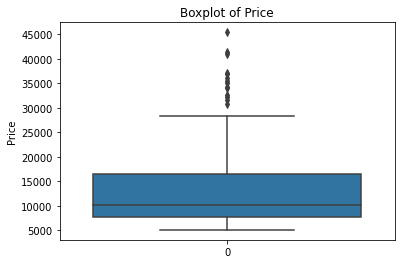

In [33]:
#display the quartiles of 'price' and check outliers
sns.boxplot(df['price'])
plt.title("Boxplot of Price")
plt.ylabel("Price");

❌ we see that there are some `Outliers` nearly after `30000`

In [34]:
# calculate summary statistics
summary = df['price'].describe()
# calculate IQR
q1 = summary['25%']
q3 = summary['75%']
iqr = q3 - q1
# calculate upper and lower whiskers
upper_whisker = q3 + 1.5*iqr
lower_whisker = q1 - 1.5*iqr
# identify outliers
outliers = df[(df['price'] > upper_whisker) | (df['price'] < lower_whisker)]
outliers # there is 14 record

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
15,0,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760.0
16,0,NaN,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
17,0,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0
47,0,145,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0
48,0,NaN,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0
49,0,NaN,jaguar,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0
70,-1,93,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123,4350,22,25,31600.0
71,-1,NaN,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.1,8.3,155,4750,16,18,34184.0
72,3,142,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.1,8.3,155,4750,16,18,35056.0
73,0,NaN,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.8,3.35,8.0,184,4500,14,16,40960.0


#### ❌❗ symboling col ➡ 1 

☣ a measure of the `risk` associated with insuring a car on a scale of ` -3 `  least risky to ` +3 ` most risky 

In [35]:
#get type of `symboling` column
col_names[0] , df[col_names[0]].dtype

('symboling', dtype('int64'))

In [36]:
# count each unique value in the column
df[col_names[0]].value_counts(dropna=False)

 0    65
 1    52
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

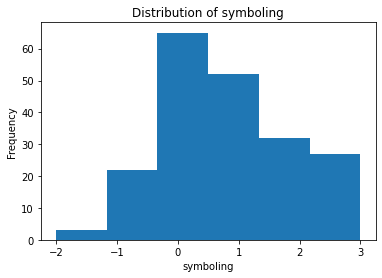

In [37]:
# Plot a histogram for the 'symboling' column
plt.hist(df[col_names[0]], bins=6)
# Add labels and a title
plt.xlabel('symboling')
plt.ylabel('Frequency')
plt.title('Distribution of symboling')
# Show the plot
plt.show()

* we will find it's have a little right skewed , so most cars are `least risky` 
* but over all we can consider it act like `normally distributed` 

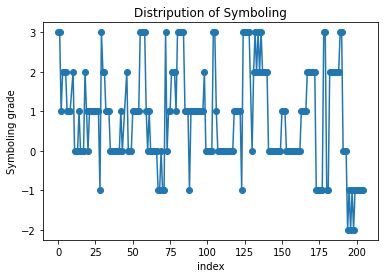

In [38]:
#find most trending
plt.scatter(x=df['symboling'].index, y=df['symboling']);
df['symboling'].plot()
plt.title("Distripution of Symboling")
plt.xlabel("index")
plt.ylabel("Symboling grade");

* we will find that are most cars are in grade `0` , `1` , `2` , `3` , which mean that overall most cars are save `least risky` .
* but in specific , we find that trending in grade `0` , `1` and `2` which is quite or moderate save.

In [39]:
#summary statistics
df['symboling'].describe()

count    201.000000
mean       0.840796
std        1.254802
min       -2.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: symboling, dtype: float64

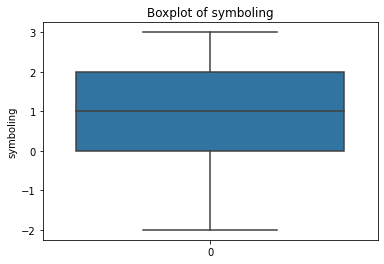

In [40]:
#display the quartiles of 'price' and check outliers
sns.boxplot(df['symboling'])
plt.title("Boxplot of symboling")
plt.ylabel("symboling");

* according to data in this column are divided into classes , so we can't find any outliers , and we see that `mean` are too close to `50%` 

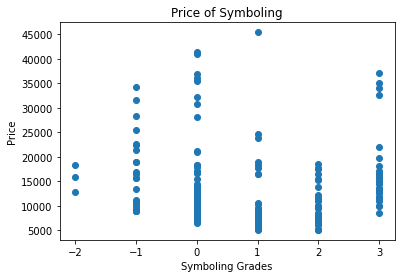

In [41]:
#plot "Price" of each "Symboling" grade
plt.scatter(x=df['symboling'], y=df['price'])
plt.title("Price of Symboling")
plt.xlabel("Symboling Grades")
plt.ylabel("Price");

* we notice that most ` Symboling ` ` Prices ` is less than ` 25000 `

In [42]:
len(df[df['price'] < 25000]['symboling']) / len(df)

0.9154228855721394

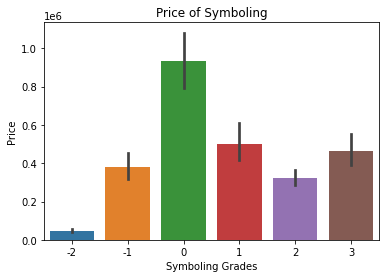

In [43]:
#onther way using "barplot"
sns.barplot(x='symboling' , y='price' ,data=df , estimator = sum);
plt.title("Price of Symboling")
plt.xlabel("Symboling Grades")
plt.ylabel("Price");

* here is the `price` ratio of each `symboling` grade
* each bar indicating the total sum of the `price`

In [44]:
df[df['symboling']==0]['price'].sum()

935811.0

#### 💰❌ normalized-losses col ➡ 2

❌💰 a measure of the average loss payment per insured vehicle year

In [45]:
col_names[1]

'normalized-losses'

In [46]:
# find column type
df['normalized-losses'].dtype

dtype('O')

In [47]:
# get number of unique values 
df['normalized-losses'].value_counts(dropna=False)

NaN    37
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64

* we see that , it must be `float` not `object` 
* there are `37` `NAN`

In [48]:
# convert the column type to float
df['normalized-losses'] = df['normalized-losses'].astype(float)

In [49]:
# find total numbers of `NAN`
df['normalized-losses'].isna().sum()

37

In [50]:
#display summary statistical 
df['normalized-losses'].describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normalized-losses, dtype: float64

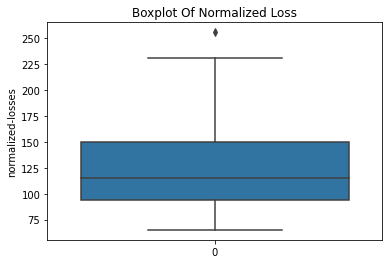

In [51]:
# display summary statistical with `boxplot`
sns.boxplot(df['normalized-losses'])
plt.title("Boxplot Of Normalized Loss")
plt.ylabel("normalized-losses");

* we find that `mean` is too close from `50%` 
* notice there are `outliers` after `200`

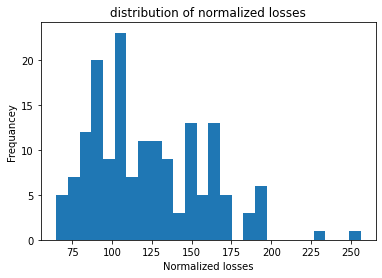

In [52]:
#display the distribution of `normalized-losses`
plt.hist(df['normalized-losses'],bins=26)
plt.title("distribution of normalized losses")
plt.xlabel("Normalized losses")
plt.ylabel("Frequancey");

* we find it `left skewed` , and here the `outliers` after `200`

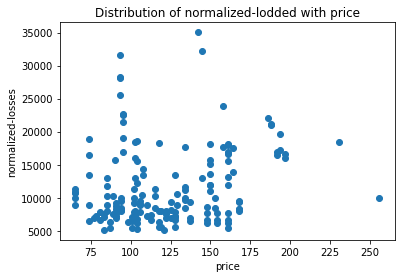

In [53]:
#Distribution of "normalized-lodded" with "price"
plt.scatter(df['normalized-losses'],df['price'])
plt.title("Distribution of normalized-lodded with price")
plt.xlabel("price")
plt.ylabel("normalized-losses");

* we find that cars with `less price` hase `less loss` .
* most of data are distributed under scale of `price = 175` and `normalized-loss = 20000` .

#### ⛓ make col ➡ 3

🏰 the make or manufacturer of the car

In [54]:
col_names[2],df[col_names[2]].dtype

('make', dtype('O'))

In [55]:
# get numbers of each unique value in column
df['make'].value_counts(dropna=False)

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64

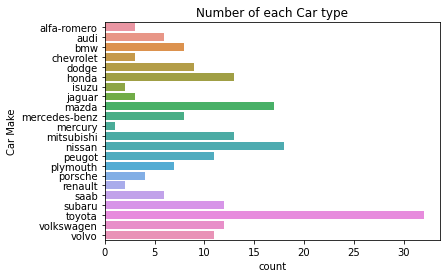

In [56]:
#display the count of each car type
sns.countplot(y='make',data=df)
plt.title("Number of each Car type")
plt.ylabel("Car Make");

* we notice that `toyota` , `nissan` ,`mazda` are the `top 3`

In [57]:
# sammary statistics
df['make'].describe()

count        201
unique        22
top       toyota
freq          32
Name: make, dtype: object

* we find that `toyota` is the most frequency by `32` 

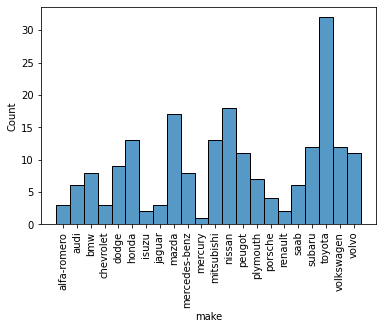

In [58]:
sns.histplot(data=df,x='make');plt.xticks(rotation=90);

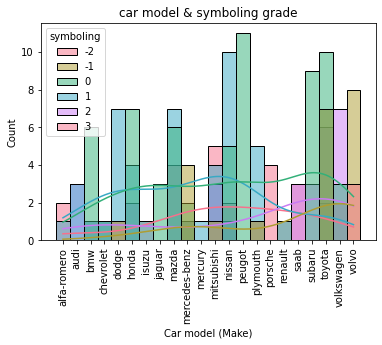

In [59]:
# plot each car model with symboling
sns.histplot(data=df,x='make',kde=True,hue='symboling' , palette='husl')
plt.title("car model & symboling grade")
plt.xlabel("Car model (Make)")
#plt.yticks(ticks=list(range(0,35,5)))
plt.xticks(rotation=90);

⏰ notice that scale of ` -3 `  least risky to ` +3 ` most risky 
* we see that `volvo` is most `risky` model in grad `-2` is `3 cars ` & grade `-1` with `8 cars` it's too dangerous
* we can find that `peugot` is the most car in grade `0` with ` 11 car `
* we find that `nissan` is the most car in grade `1` with `10 cars`
* we find that `volkswagen` is the most car in grade `2` with `7 cars`
* we find that `mitsubishi` is the most `save` car in grade `3` with `5 cars` 

In [60]:
#number of "volvo" cars in grade "-2" ,"-1" 
m1=df['make'] == 'volvo'
m2=df['symboling']== -1
m3=df['symboling']== -2
len(df[ m1 & m2 | m3 ])

11

In [61]:
#number of "peugot" cars in grade "0"
m1=df['make'] == 'peugot'
m2=df['symboling']== 0
len(df[ m1 & m2])

11

In [62]:
#number of "nissan" cars in grade "1"
m1=df['make'] == 'nissan'
m2=df['symboling']== 1
len(df[ m1 & m2])

10

In [63]:
#number of "volkswagen" cars in grade "2"
m1=df['make'] == 'volkswagen'
m2=df['symboling']== 2
len(df[ m1 & m2])

7

In [64]:
#number of "mitsubishi" cars in grade "3"
m1=df['make'] == 'mitsubishi'
m2=df['symboling']== 3
len(df[ m1 & m2])

5

* i do it manually , lets do it by ` pivot_table`

In [65]:
# create a pivot table with index = 'make', columns = 'symboling', and values = count of each make in symboling
pivot_table = pd.pivot_table(df, values='price', index='make', 
                             columns='symboling', aggfunc='count').fillna(0).astype(int)
pivot_table.head()

symboling,-2,-1,0,1,2,3
make,,,,,,
alfa-romero,0,0,0,1,0,2
audi,0,0,0,3,3,0
bmw,0,0,6,1,1,0
chevrolet,0,0,1,1,1,0
dodge,0,1,0,7,0,1


* now we can get numbers of any car model `make` in each risk grade `symboling`

* we can do same code but replace aggfunc='count' with aggfunc='sum', then we get the total `peice` of each car model `make` in each grade `symboling` 
* we can  do the same but insted of `price` we can make it `normalized-loss` , then we can know the `loss` of each model `make` in each grade `symboling` 

In [66]:
#for example => find number of `dodge` cars in symboling grade `1`
pivot_table.loc['dodge',1]

7

In [67]:
#number of "dodge" cars in grade "1"
m1=df['make'] == 'dodge'
m2=df['symboling']== 1
len(df[ m1 & m2])

7

In [68]:
#get the most frequent car model in each grade
print(" ❌  is risky  ✅ is save \n")
for i in range(-2,4):
  if i <0:
    print(f"❌  the most frequent car in risky grade {i} is :{pivot_table[i].idxmax()}")
  elif i ==0:
    print(f"❗✅ the most frequent car in risky grade {i} is :{pivot_table[i].idxmax()}")
  else:
    print(f"✅  the most frequent car in risky grade {i} is :{pivot_table[i].idxmax()}")

 ❌  is risky  ✅ is save 

❌  the most frequent car in risky grade -2 is :volvo
❌  the most frequent car in risky grade -1 is :volvo
❗✅ the most frequent car in risky grade 0 is :peugot
✅  the most frequent car in risky grade 1 is :nissan
✅  the most frequent car in risky grade 2 is :volkswagen
✅  the most frequent car in risky grade 3 is :mitsubishi


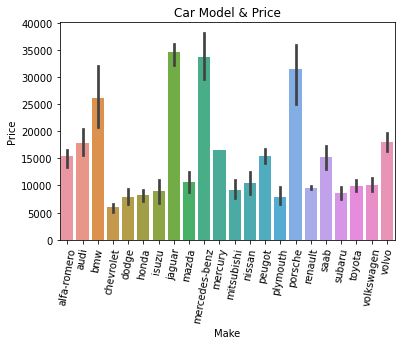

In [69]:
# plot cars model "make" with "price"
sns.barplot(x='make' , y='price' , data=df )
plt.title("Car Model & Price")
plt.xlabel("Make")
plt.ylabel("Price")
plt.xticks(rotation=80);

* we find that most expensive models are `jaguar` , `mercedes-benz` , `porsche` , `bmw` , those are `top 4 `

/usr/local/lib/python3.9/dist-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/usr/local/lib/python3.9/dist-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/usr/local/lib/python3.9/dist-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


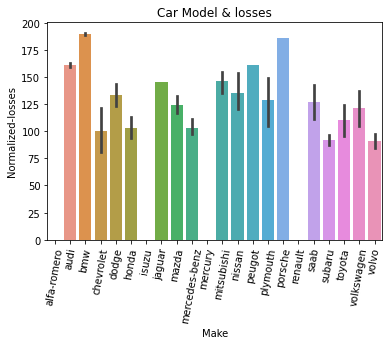

In [70]:
# plot cars model "make" with "normalized-losses"
sns.barplot(x='make' , y='normalized-losses' , data=df ,estimator=np.mean);
plt.title("Car Model & losses");
plt.xlabel("Make");
plt.ylabel("Normalized-losses");
plt.xticks(rotation=80);

* we find that `bmw`,`porsche` are the most company in `loss`

#### ⛽ fuel-type col ➡ 4

* ⛽ this is the `fuel` type of each car

In [71]:
col_names[3]

'fuel-type'

In [72]:
df['fuel-type'].dtype

dtype('O')

In [73]:
df['fuel-type'].value_counts(dropna=False)

gas       181
diesel     20
Name: fuel-type, dtype: int64

In [74]:
df['fuel-type'].value_counts(normalize=True)

gas       0.900498
diesel    0.099502
Name: fuel-type, dtype: float64

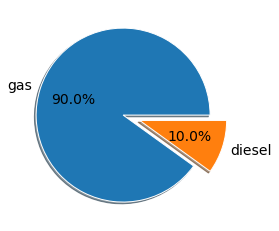

In [75]:
plt.pie(df['fuel-type'].value_counts(), labels=['gas','diesel'], 
        explode=[0,0.2], autopct='%1.1f%%', shadow=True,
        wedgeprops={'edgecolor':'w'}, textprops={'fontsize': 14});

* we see that `90 %` of cars are use `gas `
* it an `imblanced` column so, it will affect on analysis

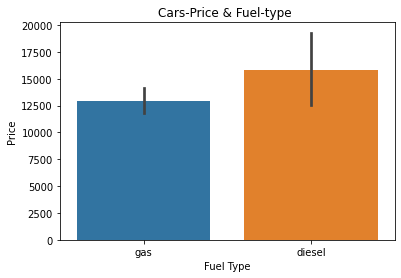

In [76]:
# display total price of cars uses each fuel type
sns.barplot(data=df,x='fuel-type',y='price')
plt.title("Cars-Price & Fuel-type ")
plt.xlabel("Fuel Type")
plt.ylabel("Price");

* in spite of most of cars uses `gas` but we find that , total `price` of cars that uses `diesl` is more that `gas` 

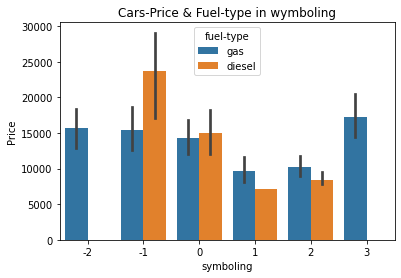

In [77]:
# display total price of cars uses each fuel type in each symboling
sns.barplot(data=df,x='symboling',y='price',hue='fuel-type')
plt.title("Cars-Price & Fuel-type in wymboling")
plt.xlabel("symboling")
plt.ylabel("Price");

* we notice that all `symboling` uses gas , but `diesel` just in `-1`,`0`,`1`,`2` 
* we find that most expisive cars are in grade `-1` of risk and uses `diesel` 
* notice that `most save`and `most risky` cars with grade `3`,`-2` uses only `gas`

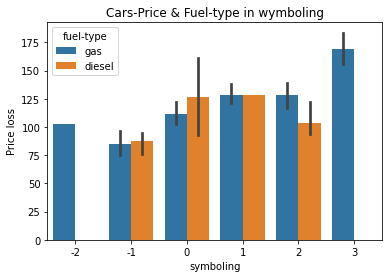

In [78]:
# display total price loss of cars uses each fuel type in each symboling
sns.barplot(data=df,x='symboling',y='normalized-losses',hue='fuel-type')
plt.title("Cars-Price & Fuel-type in wymboling")
plt.xlabel("symboling")
plt.ylabel("Price loss");

* we find that , cars uses `gas` with risky grade `3` , are most cars `losses` much mony 

#### 🚀 aspiration col ➡ 5

* 🚀 aspiration: a categorical variable that describes whether the car has a naturally aspirated or turbocharged engine.

In [79]:
col_names[4],df[col_names[4]].dtype

('aspiration', dtype('O'))

In [80]:
df['aspiration'].value_counts()

std      165
turbo     36
Name: aspiration, dtype: int64

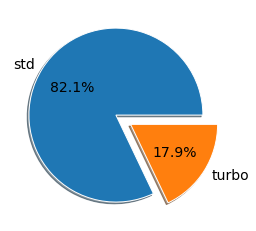

In [81]:
#display ratio of each category
plt.pie(df['aspiration'].value_counts(), labels=['std','turbo'], 
        explode=[0,0.2], autopct='%1.1f%%', shadow=True,
        wedgeprops={'edgecolor':'w'}, textprops={'fontsize': 14});

* we find that cars with `std` engine is `82 %` of our data

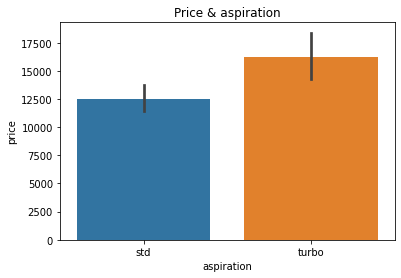

In [82]:
#display the total price of cars according its aspiration 
sns.barplot(x='aspiration',y='price',data=df)
plt.title("Price & aspiration")
plt.xlabel("aspiration")
plt.ylabel("price");

* cars uses `turbo` are more expensive than that uses `std`

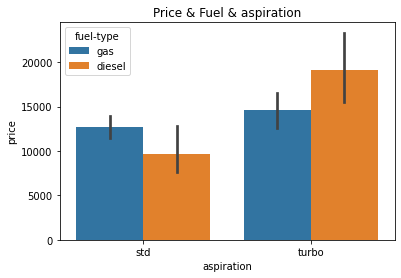

In [83]:
#display the total price of cars according its fuel-type and aspiration 
sns.barplot(x='aspiration',y='price',data=df,hue='fuel-type')
plt.title("Price & Fuel & aspiration")
plt.xlabel("aspiration")
plt.ylabel("price");

* we find that most `expensive` cars have `turbo` engine and uses `diesel`

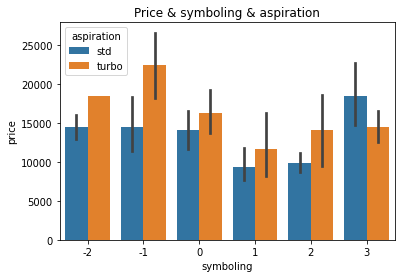

In [84]:
#display the total price of cars according its symboling and aspiration 
sns.barplot(x='symboling',y='price',data=df,hue='aspiration')
plt.title("Price & symboling & aspiration")
plt.xlabel("symboling")
plt.ylabel("price");

* we notice that cars uses `turbo` are `expensive` and `risky` with grade `-1`
* most cars uses `std` are less than `15000` , its almost found in all `symboling` grades

#### 🚪 num-of-doors col ➡ 6

* describes the number of doors on the car.

In [85]:
col_names[5] ,df[col_names[5]].dtype

('num-of-doors', dtype('O'))

In [86]:
df['num-of-doors'].value_counts(dropna=False)

four    113
two      86
NaN       2
Name: num-of-doors, dtype: int64

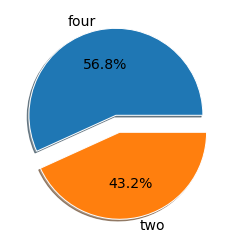

In [87]:
#display ratio of each category
plt.pie(df['num-of-doors'].value_counts(), labels=['four','two'], 
        explode=[0,0.2], autopct='%1.1f%%', shadow=True,
        wedgeprops={'edgecolor':'w'}, textprops={'fontsize': 14});

* we see that cars `almost balanced ` in this column

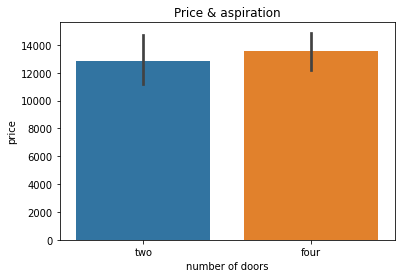

In [88]:
#display the total price of cars according to number of dors 
sns.barplot(x='num-of-doors',y='price',data=df)
plt.title("Price & aspiration")
plt.xlabel("number of doors")
plt.ylabel("price");

* we see that cars with `four` doors are a little expensive , but overall they are balanced in `price`

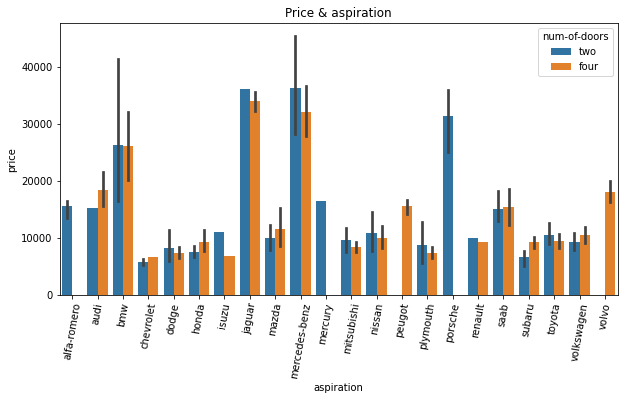

In [89]:
#display the total price of cars according its aspiration 
plt.figure(figsize=(10,5))
sns.barplot(x='make',y='price',data=df, hue='num-of-doors')
plt.title("Price & aspiration")
plt.xlabel("aspiration")
plt.xticks(rotation=80)
plt.ylabel("price");

* we find that models `alfa-romero`,`mercury`,`porsche`, its cars have only `two` doors , it have no cars with four doors
* we see that `volvo` has only cars with `four` doors 
* we find that `top 3` models in `price` are  `jaguar`,`mercedes-benz`,`bmw`, its cars have `two` as same as `four` doors 

#### 🚙 body-style col ➡ 7

* 🚙 describes the style of the car's body.

In [90]:
col_names[6],df[col_names[6]].dtype

('body-style', dtype('O'))

In [91]:
#get number of each unique value
df['body-style'].value_counts()

sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

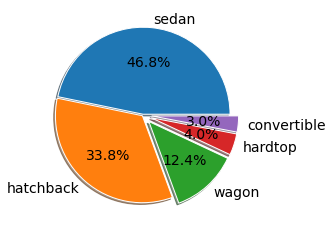

In [92]:
#display ratio of each category
plt.pie(df['body-style'].value_counts(), labels=list(df['body-style'].value_counts().index), 
        explode=[0.01,0.01,0.1,0.1,0.1], autopct='%1.1f%%', shadow=True,
        wedgeprops={'edgecolor':'w'}, textprops={'fontsize': 14});

* most cars have a body of `sedan` and `hatchack`

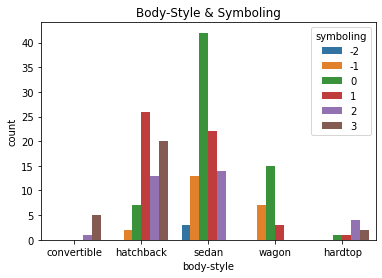

In [93]:
#plot the relation between "body-style" & 'symboling
sns.countplot(x="body-style", hue="symboling", data=df)
plt.title("Body-Style & Symboling")
plt.xlabel("body-style");

* ❌ alert , all cars with `convertible` have `3`,`2` grade of `risky` its too dangerous.
* ✅ all cars with `wagon` body are save , it have `-1`,`0`,`1` grade of `risky`
*over all we can see that `sedan` is the most save cars , according to its hieghlly existing but it have a moderate balance of risky grades

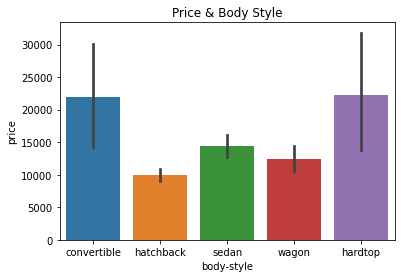

In [94]:
#display the total price of cars according to body style
sns.barplot(x='body-style',y='price',data=df)
plt.title("Price & Body Style")
plt.xlabel("body-style")
plt.ylabel("price");

* in spite of `convertible` and `hardtop` are the lowest , but also they are the the most expensive cars 

In [95]:
# Group the data by make and body-style
grouped = df.groupby(['make', 'body-style']).size().reset_index(name='counts')
grouped.head()

,make,body-style,counts
0,alfa-romero,convertible,2
1,alfa-romero,hatchback,1
2,audi,sedan,5
3,audi,wagon,1
4,bmw,sedan,8


In [96]:
# get the number of cars according to its model and body style
pivot_table1 = pd.pivot_table(grouped, values='counts', index=['make'], columns=['body-style'], fill_value=0)
pivot_table1.head()

body-style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
alfa-romero,2,0,1,0,0
audi,0,0,0,5,1
bmw,0,0,0,8,0
chevrolet,0,0,2,1,0
dodge,0,0,5,3,1


In [97]:
#an example 
pivot_table1.loc['dodge','hatchback']

5

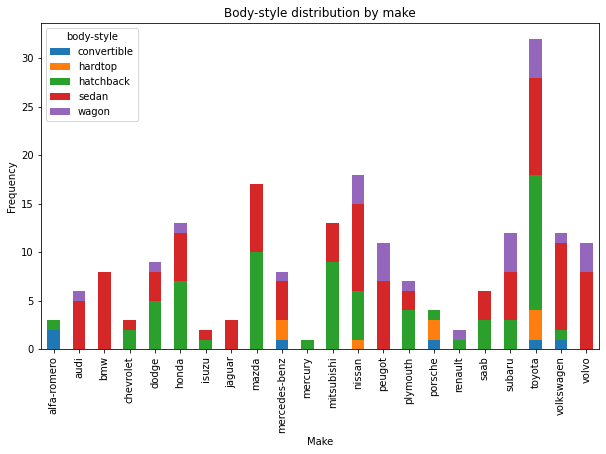

In [98]:
# Plot the data
ax = pivot_table1.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel("Frequency")
ax.set_xlabel("Make")
ax.set_title("Body-style distribution by make")
# Show the plot
plt.show()

* each  color represent a `body-style` type , and all column length represent the total number of car `make` 
* we can see that all `bmw` cars are made of `sedan` 
* `toyota` uses all `body-style` types , but focus on `hatchback` and `sedan` 
* `volvo` the most `risky` car , also uses `sedan` and less of `wagon` 
* over all `hatchback` abd `sedan` are the most `body-atyle` used types

#### ☮ drive-wheels col ➡ 8

* describes the type of drive wheels (front-wheel, rear-wheel, or four-wheel drive)

In [99]:
col_names[7],df[col_names[7]].dtype

('drive-wheels', dtype('O'))

In [100]:
df['drive-wheels'].value_counts(dropna=False)

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

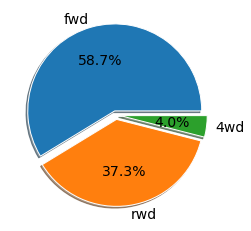

In [101]:
#display ratio of each category
plt.pie(df['drive-wheels'].value_counts(), labels=list(df['drive-wheels'].value_counts().index), 
        explode=[0.05,0.05,0.05], autopct='%1.1f%%', shadow=True,
        wedgeprops={'edgecolor':'w'}, textprops={'fontsize': 14});

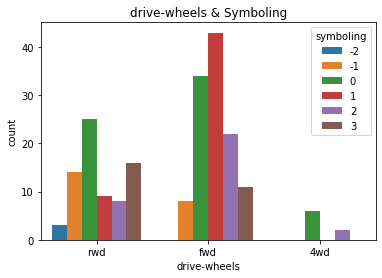

In [102]:
#plot the relation between "drive-wheels" & 'symboling
sns.countplot(x="drive-wheels", hue="symboling", data=df)
plt.title("drive-wheels & Symboling")
plt.xlabel("drive-wheels");

* we found the most `risky` in grade `3` are cars with `rwd`
* over all , i think that `drive-wheels` doesn't affect on `symboling` , because the plot tells me that almost all `drive-wheels` contain all levels of `symboling` 


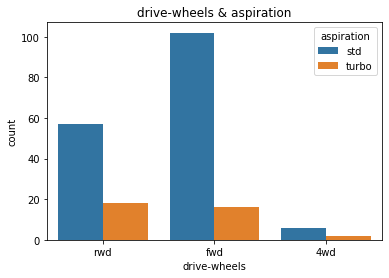

In [103]:
#plot the relation between "drive-wheels" & 'aspiration'
sns.countplot(x="drive-wheels", hue="aspiration", data=df)
plt.title("drive-wheels & aspiration")
plt.xlabel("drive-wheels");

* here we see that most `std` cars are `fwd` , and lowest in both are `4wd`

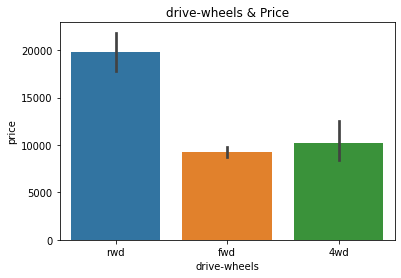

In [104]:
#plot the relation between "drive-wheels" & 'price'
sns.barplot(x="drive-wheels", y="price", data=df)
plt.title("drive-wheels & Price")
plt.xlabel("drive-wheels")
plt.ylabel("price");

* the descending order in price is `rwd`,`4wd`, `fwd`

#### 🚘 engine-location col ➡ 9

* describes the location of the engine in the car (front or rear)

In [105]:
col_names[8],df[col_names[8]].dtype

('engine-location', dtype('O'))

In [106]:
df['engine-location'].value_counts(dropna=False)

front    198
rear       3
Name: engine-location, dtype: int64

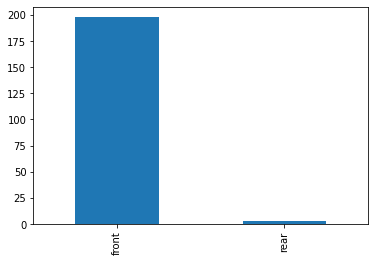

In [107]:
df['engine-location'].value_counts(dropna=False).plot(kind='bar');

* we see a big imblanced here ! , almost all cars have a `front` engine

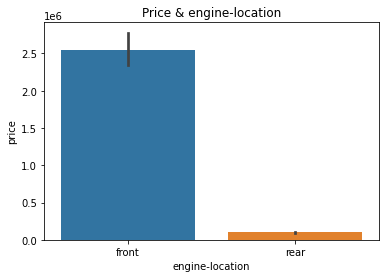

In [108]:
#display the total price of cars according to engine location
sns.barplot(x='engine-location',y='price',data=df, estimator=sum)
plt.title("Price & engine-location")
plt.xlabel("engine-location")
plt.ylabel("price");

* as expected `front` engines are the heighest `price` , it's not fair accoeding to imblanced 

In [109]:
# the cars with `rear` engine
df[df['engine-location']=='rear']['make']

126    porsche
127    porsche
128    porsche
Name: make, dtype: object

#### 📏 wheel-base col ➡ 10

* describes the distance between the centers of the front and rear wheels.

In [110]:
col_names[9],df[col_names[9]].dtype

('wheel-base', dtype('float64'))

In [111]:
#get number of missing values
df['wheel-base'].isna().sum()

0

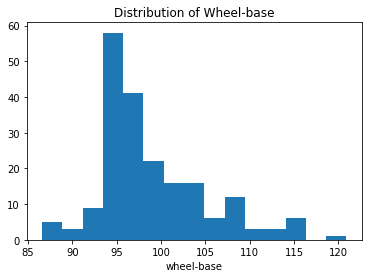

In [112]:
#plot the histogram of column
plt.hist(df['wheel-base'],bins=15)
plt.title("Distribution of Wheel-base")
plt.xlabel("wheel-base");

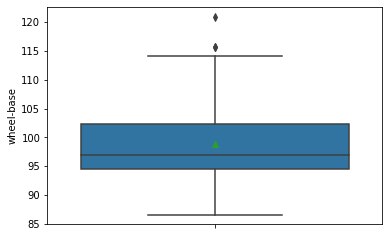

In [113]:
# plot the boxplot of the `wheel-base`
sns.boxplot(y='wheel-base',data=df,showmeans=True);

* we see that data are `nurmally distributed` 
* most of data are between `93` and `110`
* it seems we have `outliers` after `115`

In [114]:
#sammary statistical 
df['wheel-base'].describe()

count    201.000000
mean      98.797015
std        6.066366
min       86.600000
25%       94.500000
50%       97.000000
75%      102.400000
max      120.900000
Name: wheel-base, dtype: float64

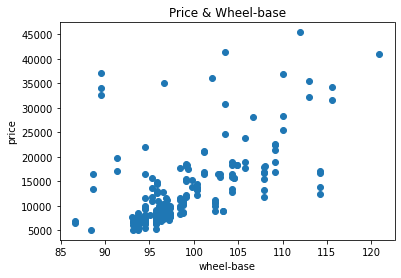

In [115]:
# relation between 'wheel-base' and 'price'
plt.scatter(df['wheel-base'],y=df['price'])
plt.title("Price & Wheel-base")
plt.xlabel("wheel-base")
plt.ylabel("price");

* most data are between `93` and `110` according to `wheel-base` , and less than `25000` according to its price 

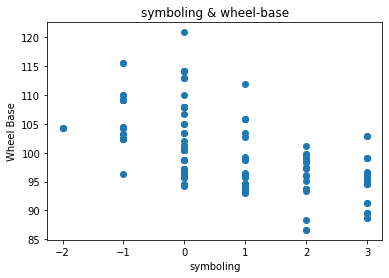

In [116]:
# plot the realation between 'symboling' & 'wheel-base'
plt.scatter(y=df['wheel-base'], x=df['symboling'])
plt.title("symboling & wheel-base")
plt.xlabel('symboling')
plt.ylabel('Wheel Base')
plt.show();

* we notice that most `risky` cars are `less` than `105` of `wheel-base`
* more `increase` in `wheel-base` is more `save` 

#### 🗼 length col ➡ 11

* describes the length of the car.

In [117]:
col_names[10],df[col_names[10]].dtype

('length', dtype('float64'))

In [118]:
df['length'].isna().sum()

0

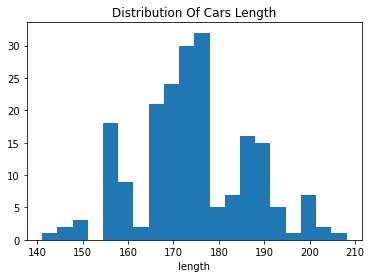

In [119]:
# plot the distribution of cars length
plt.hist(df['length'],bins=20)
plt.title("Distribution Of Cars Length")
plt.xlabel("length");

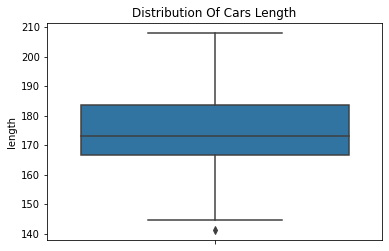

In [120]:
# plot the distribution of cars length
sns.boxplot(y=df['length'])
plt.title("Distribution Of Cars Length");

* we can see that data is `normally distributed` 
* have a lower `outlier` before `145` 

In [121]:
df['length'].describe()

count    201.000000
mean     174.200995
std       12.322175
min      141.100000
25%      166.800000
50%      173.200000
75%      183.500000
max      208.100000
Name: length, dtype: float64

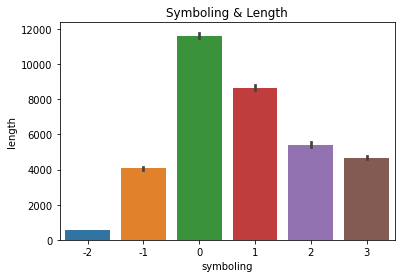

In [122]:
# relation between 'symboling' and 'length'
sns.barplot(data=df,x='symboling',y='length',estimator='sum')
plt.title("Symboling & Length")
plt.xlabel("symboling")
plt.ylabel("length");

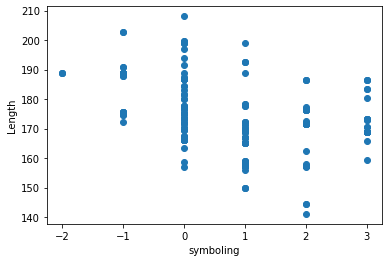

In [123]:
plt.scatter(x=df['symboling'],y=df['length'] )
plt.xlabel('symboling')
plt.ylabel('Length')
plt.show();

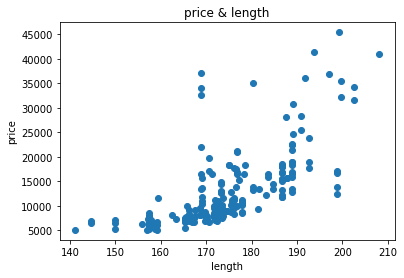

In [124]:
# relation between price and length
plt.scatter(x=df['length'],y=df['price'] )
plt.title("price & length")
plt.xlabel('length')
plt.ylabel('price')
plt.show();

#### 🚛 width col ➡ 12

* describes the width of the car.

In [125]:
col_names[11],df[col_names[11]].dtype

('width', dtype('float64'))

In [126]:
df['width'].isna().sum()

0

In [127]:
df['width'].describe()

count    201.000000
mean      65.889055
std        2.101471
min       60.300000
25%       64.100000
50%       65.500000
75%       66.600000
max       72.000000
Name: width, dtype: float64

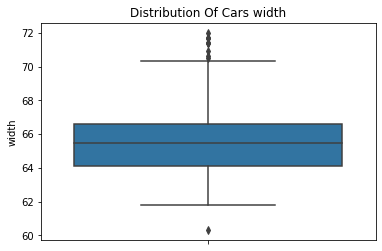

In [128]:
# plot the distribution of cars width
sns.boxplot(y=df['width'])
plt.title("Distribution Of Cars width");

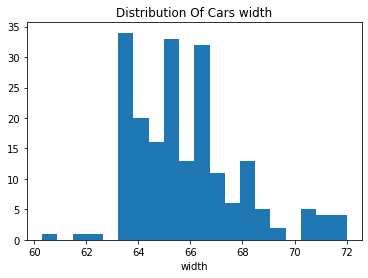

In [129]:
# plot the distribution of cars width
plt.hist(df['width'],bins=20)
plt.title("Distribution Of Cars width")
plt.xlabel("width");

* it seems `normally distributed` 
* hase `outliers` before `62` and after `70`

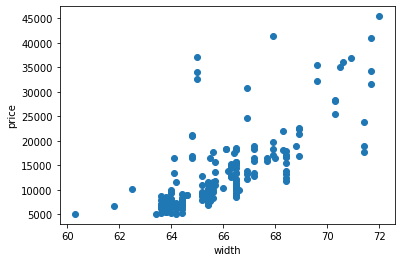

In [130]:
# plot relation between width & price
plt.scatter(x=df['width'],y=df['price'] )
plt.xlabel('width')
plt.ylabel('price')
plt.show();

* most of data between `width` of `63` and `70` and under `25000` of `price`
* there is a `linear positive` realation 

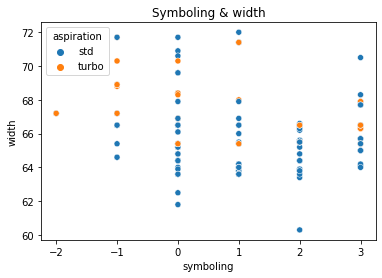

In [131]:
# relation between 'symboling' and 'length'
sns.scatterplot(data=df,x='symboling',y='width', hue="aspiration")
plt.title("Symboling & width")
plt.xlabel("symboling")
plt.ylabel("width");

* we can find that the normal range for save width i from `63` to `68`
* cars with `turbo` engine seemsto be more `risky` , `std` is more save 

#### ⬆ height col ➡ 13

* describes the height of the car.

In [132]:
col_names[12],df[col_names[12]].dtype

('height', dtype('float64'))

In [133]:
df['height'].isna().sum()

0

In [134]:
#sammary statistical
df['height'].describe()

count    201.000000
mean      53.766667
std        2.447822
min       47.800000
25%       52.000000
50%       54.100000
75%       55.500000
max       59.800000
Name: height, dtype: float64

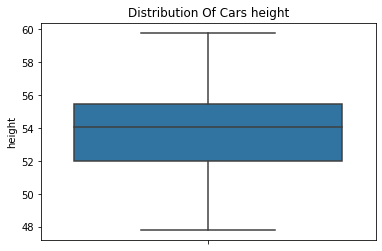

In [135]:
# plot the distribution of cars height
sns.boxplot(y=df['height'])
plt.title("Distribution Of Cars height");

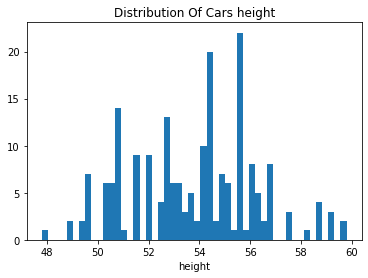

In [136]:
# plot the distribution of cars height
plt.hist(df['height'],bins=50)
plt.title("Distribution Of Cars height")
plt.xlabel("height");

* it seems like `normally distributed` , without any `outliers` 

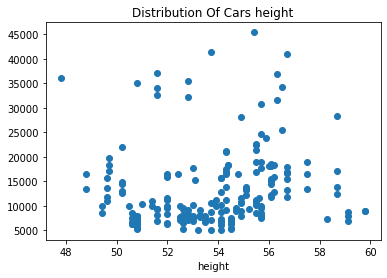

In [137]:
# plot the relation between height & price
plt.scatter(data=df,x='height',y='price')
plt.title("height & price")
plt.title("Distribution Of Cars height")
plt.xlabel("height");

* i think there is a `weak` relation 
* most of data are between `50` & `58` in `height` 

In [138]:
# correlation between price and height
df['height'].corr(df['price'])

0.13548630756805982

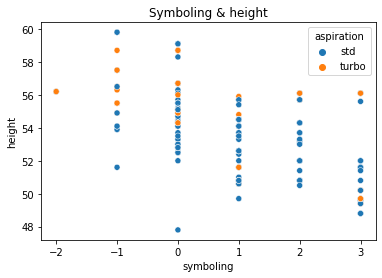

In [139]:
# relation between 'symboling' and 'height'
sns.scatterplot(data=df,x='symboling',y='height', hue="aspiration")
plt.title("Symboling & height")
plt.xlabel("symboling")
plt.ylabel("height");

* notice that , the `lower` the `height` the `greater` the `safety` 

#### ⭕ bore col ➡ 19

* 💽 describes the diameter of the cylinders in the car's engine.

In [140]:
df['bore'] = df['bore'].astype(float)

In [141]:
df['bore'].isna().sum()

4

####stroke col

In [142]:
df['stroke'] = df['stroke'].astype(float)

In [143]:
df['stroke'].isna().sum()

4

####horsepower col

In [144]:
df['horsepower'] = df['horsepower'].astype(float)

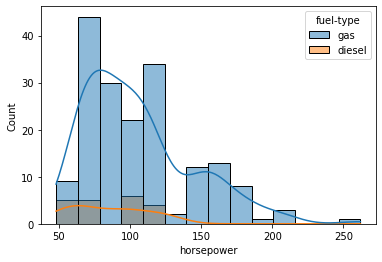

In [145]:
sns.histplot(x='horsepower',data = df,kde=True,hue='fuel-type');

####peak-rpm col

In [146]:
df['peak-rpm'] = df['peak-rpm'].astype(float)

## PreProcessing 🧮

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [148]:
df.isna().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [149]:
# drop nulls from price
df.dropna(subset=['price'], axis=0, inplace=True)

In [150]:
#create a copy from df
df_pip = df.copy()

In [151]:
# get all object features
obj_feat =[col for col in col_names if df[col].dtype=='object' ]
obj_feat

['make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system']

In [152]:
# split features contains less and more than 4 categories
min4_cat=[]
for col in obj_feat:
  if len(df[col].value_counts()) < 4 :
    min4_cat.append(col)

print(min4_cat)
max4_cat =[]
for col in obj_feat:
  if col not in min4_cat:
    max4_cat.append(col)
print(max4_cat)

['fuel-type', 'aspiration', 'num-of-doors', 'drive-wheels', 'engine-location']
['make', 'body-style', 'engine-type', 'num-of-cylinders', 'fuel-system']


#### fuel-type

In [153]:
# working on first feature have less than 4 category
print(min4_cat[0])
df[min4_cat[0]].value_counts()

fuel-type


gas       181
diesel     20
Name: fuel-type, dtype: int64

In [154]:
# encode data manually
df['fuel-type'] = df['fuel-type'].replace({"gas":0,"diesel":1})

In [155]:
df['fuel-type'].value_counts(dropna=False)

0    181
1     20
Name: fuel-type, dtype: int64

#### aspiration

In [156]:
# working on second feature have less than 4 category
print(min4_cat[1])
df[min4_cat[1]].value_counts(dropna=False)

aspiration


std      165
turbo     36
Name: aspiration, dtype: int64

In [157]:
df['aspiration'].dtype

dtype('O')

In [158]:
# encode data manually
df['aspiration'] = df['aspiration'].replace({"std":0,"turbo":1})

In [159]:
df[min4_cat[1]].value_counts(dropna=False)

0    165
1     36
Name: aspiration, dtype: int64

In [160]:
df['aspiration'].dtype

dtype('int64')

#### num-of-doors

In [161]:
# working on feature have less than 4 category
print(min4_cat[2])
df[min4_cat[2]].value_counts(dropna=False)

num-of-doors


four    113
two      86
NaN       2
Name: num-of-doors, dtype: int64

In [162]:
# encode data manually
df['num-of-doors'] = df['num-of-doors'].replace({"four":0,"two":1})
df['num-of-doors'] = df['num-of-doors'].fillna(df['num-of-doors'].median())
df['num-of-doors'].value_counts()

0.0    115
1.0     86
Name: num-of-doors, dtype: int64

#### drive-wheels

In [163]:
# working on feature have less than 4 category
print(min4_cat[3])
df[min4_cat[3]].value_counts(dropna=False)

drive-wheels


fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [164]:
#encode data manually
df['drive-wheels'] = df['drive-wheels'].replace({"fwd":1,"rwd":2,'4wd':3})
df['drive-wheels'].value_counts()

1    118
2     75
3      8
Name: drive-wheels, dtype: int64

#### engine-location

In [165]:
# working on feature have less than 4 category
print(min4_cat[4])
df[min4_cat[4]].value_counts(dropna=False)

engine-location


front    198
rear       3
Name: engine-location, dtype: int64

In [166]:
#encode data manually
df['engine-location'] = df['engine-location'].replace({"front":0,"rear":1})
df['engine-location'].value_counts()

0    198
1      3
Name: engine-location, dtype: int64

#### more 4 categories

In [167]:
# encode using labelencoder
le = LabelEncoder()

In [168]:
# encode all objects features have more than 4 categories
df = df.apply(lambda col: le.fit_transform(col) if col.name in max4_cat else col)

In [169]:
#df_encoded = df.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)

In [170]:
#df_encoded.head()

In [171]:
# fill each missing value with median of its column
df = df.fillna(df.median())
df.isna().sum().sum()

0

##Split

In [172]:
# split data ro features & target
y=df['price']
X=df.drop(columns='price')

In [173]:
# splitting data to train & test
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2,random_state=42)

#Build Model

##Baseline

In [174]:
# calc the model baseline
baseline = y.mean()
baseline

13207.129353233831

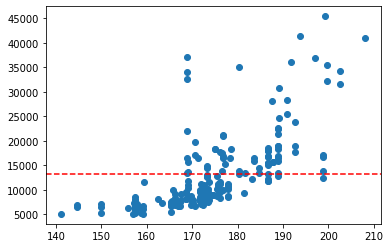

In [175]:
# any feature to plot with tarrget
plt.scatter(x=X['length'],y=y)
# Add baseline to plot
plt.axhline(baseline, color='r', linestyle='--');

* this is the base line , which the model will always predict it whatever the input

##Iterate

#### LinearRegression

In [176]:
# iimport LinearRegression
from sklearn.linear_model import LinearRegression
len_reg = LinearRegression()

In [177]:
# do cross validation in 5 folds on LinearRegression
cv_acc_scores = cross_val_score(len_reg, X_train , y_train , cv = 5 , n_jobs=-1)
print(cv_acc_scores)

[0.76827258 0.76430046 0.86242583 0.65324476 0.84668373]


* as we have `26 feature` so `LinearRegression` will perform bad 
* the max `score` from `5` is `86 %` which not good

#### RandomForestRegressor

In [300]:
# using RandomForestRegressor
ra_reg = RandomForestRegressor()

In [301]:
ra_reg.fit(X_train,y_train)

RandomForestRegressor()

In [302]:
ra_reg.score(X_test,y_test)

0.9266617342831723

* its better than linearRegression it has score `92 % `

In [303]:
#using cross validation on RandomForestRegressor
cv_acc_scores2 = cross_val_score(ra_reg, X_train , y_train , cv = 5 , n_jobs=-1)
print(cv_acc_scores2)

[0.87517018 0.92681208 0.84454653 0.77242574 0.87544225]


* its the same , it has score `92 % ` 

In [182]:
ra_reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [284]:

# create a dict with all params values we need to tunning it 
'''
params = {
    'n_estimators': [100, 200, 500],          # number of trees
    'max_depth': [None, 10, 20],              # maximum depth of each tree
    'min_samples_split': [2, 5, 10],          # minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],            # minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'], # number of features to consider when looking for the best split.
    'random_state': [42]
}
'''

In [310]:
# create a dict with all params values we need to tunning it 
params = {
    "max_depth" : [None , 15 , 30],           # maximum depth of each tree
    'n_estimators' : range(25,100,25),        # number of trees
    'random_state' : [42],
    'max_features': ['auto', 'sqrt', 'log2'], # number of features to consider when looking for the best split.
}

In [307]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit and transform the dataset
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [311]:
# do hyperparameter tunning using gridsearch with params 
model = GridSearchCV(
    ra_reg,
    param_grid = params,
    cv = 10,
    n_jobs = -1, 
    verbose = 1 # tell us how the trainning process is going 
)

In [312]:
# fitt model 
model.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 15, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(25, 100, 25),
                         'random_state': [42]},
             verbose=1)

In [317]:
# model accuracy
model.score(X_test_scaled,y_test)

0.9338467263116856

* ✌🔆 this indicates how well the model performs on the held-out test set. This means that the model generalizes well to new, unseen data.
* overall , `0.933 %` is better than `0.92 %`

In [318]:
# get all info of each fit 
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,param_random_state,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.109989,0.032432,0.006194,0.002824,None,auto,25,42,"{'max_depth': None, 'max_features': 'auto', 'n...",0.852756,...,0.911017,0.814332,0.817623,0.885932,0.748357,0.835555,0.899707,0.861934,0.056804,8
1,0.275387,0.035408,0.010059,0.003708,None,auto,50,42,"{'max_depth': None, 'max_features': 'auto', 'n...",0.864175,...,0.934235,0.825317,0.795786,0.884949,0.726725,0.849038,0.892268,0.862460,0.064422,5
2,0.451421,0.082948,0.020250,0.009234,None,auto,75,42,"{'max_depth': None, 'max_features': 'auto', 'n...",0.874415,...,0.938954,0.806848,0.792271,0.880223,0.729195,0.852330,0.890489,0.862787,0.066683,1
3,0.086162,0.025604,0.006477,0.003084,None,sqrt,25,42,"{'max_depth': None, 'max_features': 'sqrt', 'n...",0.904739,...,0.886002,0.813231,0.771627,0.842031,0.740774,0.819411,0.879151,0.844380,0.056862,22
4,0.189391,0.044386,0.010512,0.004540,None,sqrt,50,42,"{'max_depth': None, 'max_features': 'sqrt', 'n...",0.893300,...,0.903170,0.805907,0.772516,0.863270,0.734271,0.824691,0.892242,0.850704,0.063109,14


In [320]:
# Extract best hyperparameters
#model.best_score_                 # max score in cv_results['mean_test_score']
#model.best_index_                 # index of row of best model in cv_results 
#model.best_estimator_             # real fitted pipeline model of best params in cv_results  
model.best_params_                  # best params of best model have best score in cv_results

{'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 75,
 'random_state': 42}

In [322]:
#get best model with best params
best_model = model.best_params_ 

In [324]:
cv_results[cv_results['mean_test_score'] == model.best_score_ ]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,param_random_state,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
2,0.451421,0.082948,0.020250,0.009234,None,auto,75,42,"{'max_depth': None, 'max_features': 'auto', 'n...",0.874415,...,0.938954,0.806848,0.792271,0.880223,0.729195,0.85233,0.890489,0.862787,0.066683,1
20,0.257089,0.007298,0.010334,0.000599,30,auto,75,42,"{'max_depth': 30, 'max_features': 'auto', 'n_e...",0.874415,...,0.938954,0.806848,0.792271,0.880223,0.729195,0.85233,0.890489,0.862787,0.066683,1


##Evaluate

In [326]:
# check model score in tranning & testing data
acc_train = model.score(X_train_scaled,y_train)
acc_test = model.score(X_test_scaled,y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.9838
Test Accuracy: 0.9338


#Communicate Results

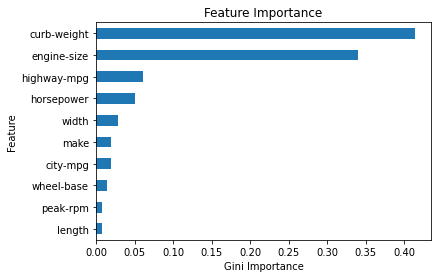

In [327]:
# Get feature names from training data
features = X_train.columns
# Extract importances from model
importances = model.best_estimator_.feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances , index=features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

* those are `top 10` features in importance
* we see here that `curb-weight` is the most important feature 

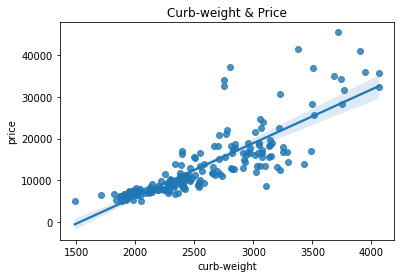

In [328]:
#plot the relation between the 'curb-weight' & 'price'
sns.regplot(x='curb-weight',y='price',data=df)
plt.title("Curb-weight & Price")
plt.xlabel("curb-weight")
plt.ylabel("price");

* WoW ❗❗❗ now we see what a strong realation between them

In [352]:
# Create the 3D scatter plot
import plotly.express as px
fig = px.scatter_3d(df_pip, x='curb-weight', y='engine-size', z='price', color='make')
# Show the plot
fig.show()

* its a `dynamic` `3d scatter` plot , hover on any point to display its info

In [338]:
#get features names
feat_imp_names = list(feat_imp.tail(10).index)
feat_imp_names.append("price")
feat_imp_names

['length',
 'peak-rpm',
 'wheel-base',
 'city-mpg',
 'make',
 'width',
 'horsepower',
 'highway-mpg',
 'engine-size',
 'curb-weight',
 'price']

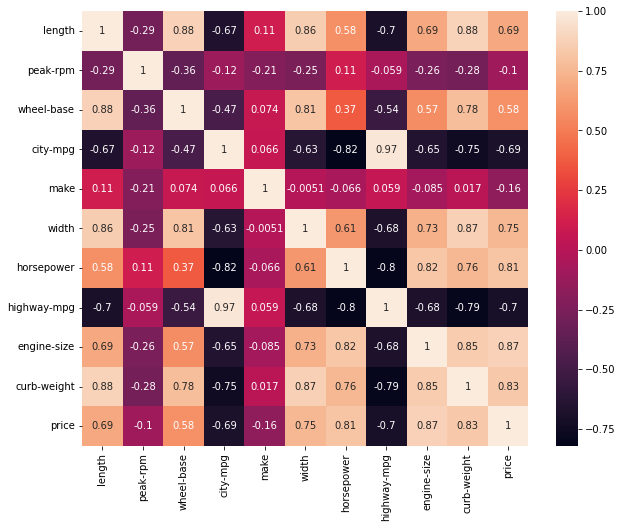

In [339]:
# plot the heatmap for top 10 features with price
plt.figure(figsize=(10,8))
sns.heatmap(df[feat_imp_names].corr(),annot=True);

# Extra 💀

In [341]:
#save the mode as a file 
import pickle
#you should run this cell to generete the model fiel
# Save model
with open("autombile.pkl",'wb') as f:
    pickle.dump(model,f)

In [342]:
# create a make_prediction function
def make_predictions(X_test, model_filepath):
    # set test data
    X_test_scaled = scaler.transform(X_test)
    # Load model
    with open(model_filepath,'rb') as f:
        best_model = pickle.load(f)
    # Generate predictions
    y_test_pred = best_model.predict(X_test)
    # Put predictions into Series with name "autombile", and same index as X_test
    y_test_pred = pd.Series(y_test_pred , index = X_test.index ,name="autombile")
    return y_test_pred

In [344]:
#get prediction of X_test 
y_test_pred = make_predictions(
    X_test=X_test,
    model_filepath="/content/autombile.pkl",
)

print("predictions shape:", y_test_pred.shape)
y_test_pred.head()

predictions shape: (41,)


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


98     33500.273333
16     33496.566667
31     33360.966667
162    33426.700000
132    33500.273333
Name: autombile, dtype: float64